# Indicadores de bienestar en México

Ejercico parecido al que se nos da, con datos obtenidos por INEGI.

In [1]:
import numpy as np
import pandas as pd

bienestar_df = pd.read_csv("indicadores_bienestar_2014.csv", index_col = 0, thousands  = ',')
bienestar_df.index.names = ['Entidad']
bienestar_df.columns.names = ['Indicadores']

Indicadores de interés.

In [2]:
bienestar_df = bienestar_df[1:] 
columnas = ['Acceso a servicios de salud',
           'Participación cívica y política',
           'Participación electoral',
           'Esperanza de vida al nacer',
           'Salud autorreportada',
           'Tasa de obesidad',
           'Niveles de educación',
           'Deserción escolar']
bienestar_df = bienestar_df[columnas]

In [3]:
bienestar_df.head()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Entidad,,,,,,,,
Aguascalientes,87.9,8.4,37.2,75.9,8.0,31.0,42.5,12.1
Baja California,80.6,4.1,30.9,74.2,8.5,39.5,44.8,19.3
Baja California Sur,84.9,3.0,52.6,76.2,8.4,43.6,48.4,11.7
Campeche,89.3,11.2,61.2,75.4,7.9,43.3,40.6,15.0
Coahuila de Zaragoza,87.2,6.5,45.0,76.0,8.2,37.1,42.9,19.1


In [5]:
bienestar_df.describe()

Indicadores,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,85.387500,7.096875,48.153125,75.221875,8.153125,34.065625,39.875000,13.100000
std,2.951517,3.002524,9.238000,0.958404,0.215503,5.247218,6.587917,4.188001
min,77.200000,1.700000,30.900000,73.000000,7.700000,25.400000,27.700000,2.800000
25%,84.400000,4.100000,41.675000,74.900000,8.075000,30.300000,35.425000,11.100000
50%,85.750000,7.450000,45.950000,75.500000,8.100000,33.300000,40.700000,13.000000
75%,87.275000,9.325000,55.575000,75.900000,8.250000,37.100000,43.100000,15.975000
max,90.900000,13.000000,70.900000,76.700000,8.500000,44.800000,58.800000,19.300000


In [6]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=4)
pca.fit(bienestar_df)
bienestar_pca = pca.transform(bienestar_df)

bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = bienestar_df.index
bienestar_pca_df.columns = ['CP_1', 'CP_2', 'CP_3', 'CP_4']

bienestar_pca_df.head()

,CP_1,CP_2,CP_3,CP_4
Entidad,,,,
Aguascalientes,-10.769060,1.981082,-2.079756,-0.778221
Baja California,-16.417348,8.691286,7.039314,-2.306827
Baja California Sur,5.952582,11.826557,2.713519,2.558316
Campeche,14.999773,2.530764,6.944728,0.505571
Coahuila de Zaragoza,-2.427343,4.146139,4.579533,-4.841711


In [10]:
print(pca.explained_variance_ratio_)

[0.45919814 0.26245041 0.10804095 0.08926823]


#### Pregunta para contestar:
#### ¿Cuanta varianza explica la primer componente principal? 
    Un 45%.
#### ¿Y la segunda? ¿Es una mucho mayor que la otra? 
    La segunda es 26%, y las dos son relativamente cercanas.
#### ¿Que puede significar eso? 
    En realidad no son muy diferentes las componentes.
#### ¿Se explica el 98 % de la varianza con ambas o no?
    No.

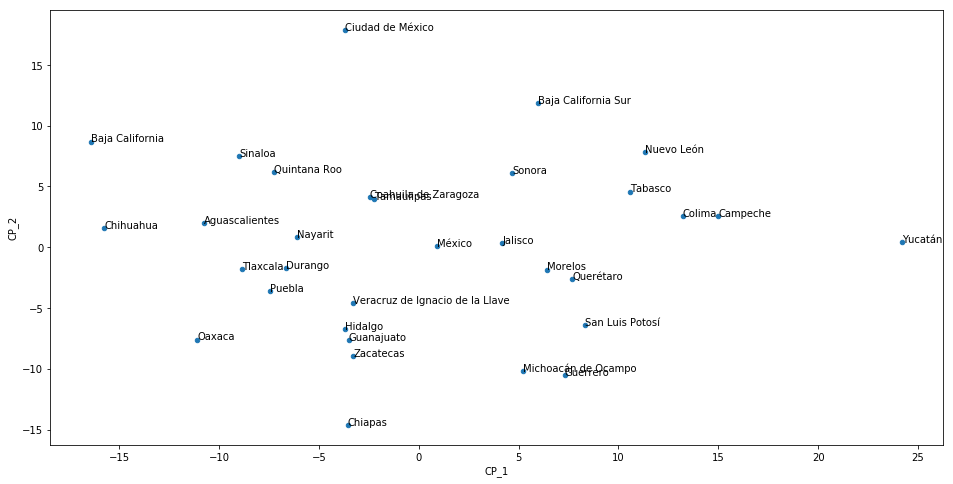

In [11]:
%matplotlib inline

ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

Text(0.5, 1.0, 'Selección de K con el método del codo')

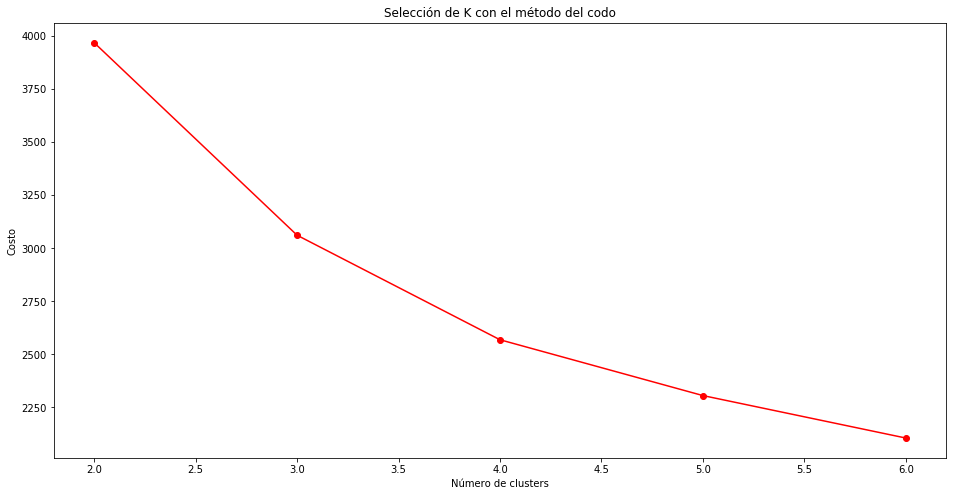

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?
    El codo 3.


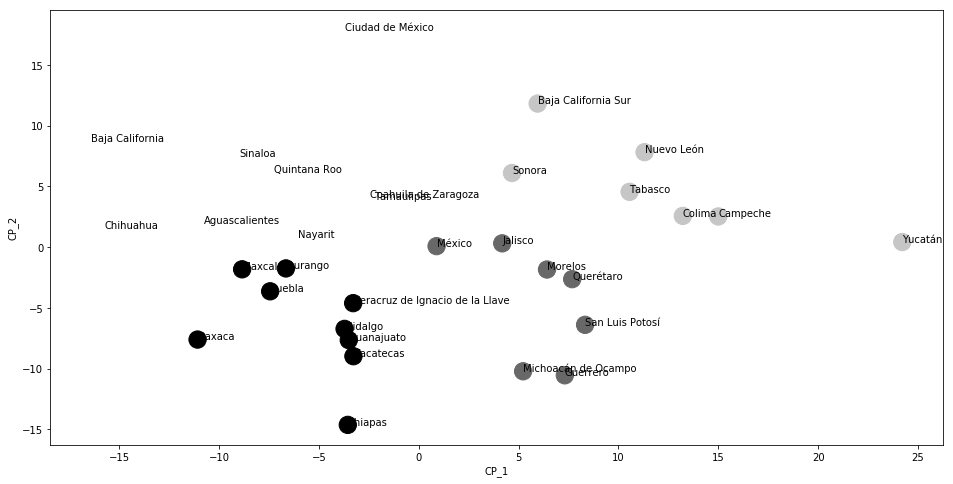

In [13]:

K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestar_pca_df.index)


ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=bienestar_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

In [14]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Porcentaje']
prototipos_df.columns.names = ['Indicador']

prototipos_df

Indicador,Acceso a servicios de salud,Participación cívica y política,Participación electoral,Esperanza de vida al nacer,Salud autorreportada,Tasa de obesidad,Niveles de educación,Deserción escolar
Porcentaje,,,,,,,,
P1,85.111111,6.355556,39.466667,75.422222,8.288889,34.966667,44.888889,12.455556
P2,86.642857,8.571429,58.942857,75.771429,8.157143,40.957143,43.828571,13.628571
P3,84.785714,6.842857,54.985714,75.057143,8.085714,29.414286,37.814286,12.514286
P4,85.155556,6.888889,43.133333,74.722222,8.066667,31.422222,33.388889,13.788889


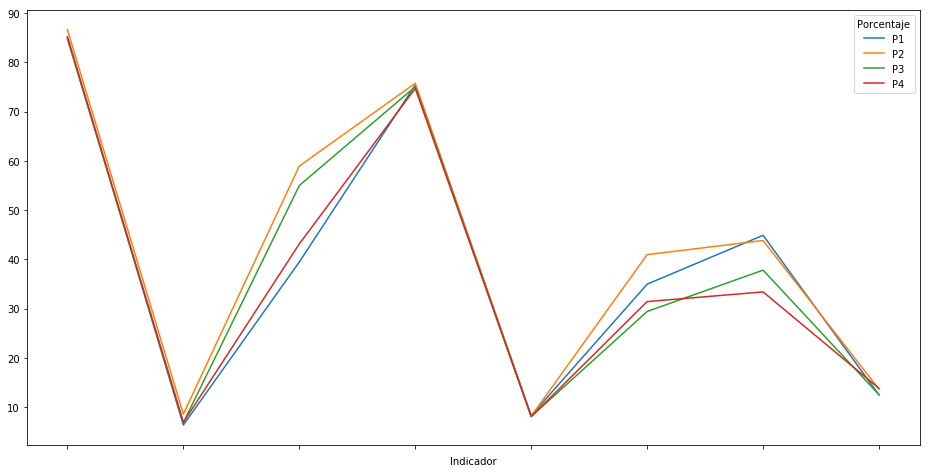

In [15]:
prototipos_df.T.plot(figsize=(16,8))

#### Pregunta para contestar: En función de las gráficas, da una explicación coherente a los diferentes prototipos y que puede significar (i.e. paises con mucha tuberculosis que van mejorando, paises que van empeorando en cuanto a casos de tuberculosis, paises que experimentaron un pico el año XXXX, etc...)

Lo que puedo observar es que en general son muy parecidos, los que sobresalen en algunos indicadores, continuan sobresaliendo en el resto.